# Machine Learning (Sentiment Analysis)

### Load Data

In [1]:
class Sentiment: # Class untuk sentiment
  POSITIVE = 'POSITIVE'
  NEGATIVE = 'NEGATIVE'

class Review: # class untuk mempermudah kita dalam mendefinisikan data
  def __init__(self, text, score) -> None:
    self.text = text
    self.score = score
    self.sentiment = self.get_sentiment()

  def get_sentiment(self): #function untuk ngubah 1 == POSITIVE dan 0 == NEGATIVE
    if (self.score == 1) :
      return Sentiment.POSITIVE
    else :
      return Sentiment.NEGATIVE

In [2]:
import pandas as pd
import numpy as np

# upload data
direc = 'movie.csv' # ini ubah sesuai sama nama file yang kamu simpen (e.g kalo aku "movie.csv")
data = pd.read_csv(direc)

# bikin loop untuk masukin tiap-tiap baris ke objek
reviews = []
for i in range(0, 40000):
  reviews.append(Review(data.iloc[i, 0], data.iloc[i, 1]))

print(reviews[0].sentiment)



NEGATIVE


### Preparation For Model

In [3]:
# ini untuk split data kita jadi 2 bagian, ada training data sama test data
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.33, random_state=42)

In [4]:
# deklarasi variabel untuk ngebuat model nantinya
train_x = [x.text for x in training]
train_y = [x.sentiment for x in training]

test_x = [x.text for x in test]
test_y = [x.sentiment for x in test]

### Bag of Words

In [5]:
# untuk ngubah kata dalam kalimat-kalimat kita jadi bentuk vektor (isinya cuman 1 dan 0)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()

train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)

### Classifier

#### Linear SVM

In [6]:
# metode ini lebih bagus, tapi ngebutuhin waktu yang agak lama (mungkin kalo PC nya bagus bisa lebih cepet)

# from sklearn.svm import SVC

# clf_svm = SVC(kernel='linear')
# clf_svm.fit(train_x_vectors, train_y)

# clf_svm.predict(test_x_vectors[0])

#### Decision Tree 

In [7]:
# metode ini kurang baik menurut aku, karna dengan waktu yang relatif lama tapi hasilnya kurang memuaskan

# from sklearn.tree import DecisionTreeClassifier

# clf_dec = DecisionTreeClassifier()
# clf_dec.fit(train_x_vectors, train_y)

# clf_dec.predict(test_x_vectors[0])


#### Logistic Regression 

In [8]:
# metode ini dipilih karna dengan waktu yang singkat, metode ini nilainya hampir bisa menyamai SVM

from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

clf_log.predict(test_x_vectors[0])


array(['NEGATIVE'], dtype='<U8')

### Evaluation

In [9]:
# ini cuman untuk evaluasi aja (ngeliat nilainya)

# print(clf_svm.score(test_x_vectors, test_y))
# print(clf_dec.score(test_x_vectors, test_y))
print(clf_log.score(test_x_vectors, test_y))

0.8938636363636364


In [10]:
# ini cuman untuk ngeliat nilai-nilainya aja, nilai akurasi dari POSITIVE sama NEGATIVE

from sklearn.metrics import f1_score

# print(f1_score(test_y, clf_svm.predict(test_x_vectors), average=None,
        #  labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE]))
# print(f1_score(test_y, clf_dec.predict(test_x_vectors), average=None,
        #        labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE]))
print(f1_score(test_y, clf_log.predict(test_x_vectors), average=None,
               labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE]))


[0.89537749 0.89230533]


## Confusion Matrix

<AxesSubplot: >

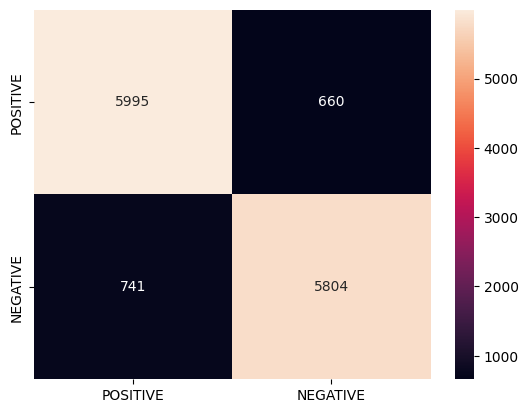

In [11]:
# ini untuk ngeliat kecocokan persebaran data dari data test kita (pake matrix)

from sklearn.metrics import confusion_matrix
import matplotlib as plt
import seaborn as sn

y_pred = clf_log.predict(test_x_vectors)

label = [Sentiment.POSITIVE, Sentiment.NEGATIVE]

cm = confusion_matrix(test_y, y_pred, labels=label)
df_cm = pd.DataFrame(cm, index=label, columns=label)

sn.heatmap(df_cm, annot=True, fmt='d')

## Try Our Sentiment Analysis

In [17]:
# masukin kata yang kita mau (karna datanya dari IMDb, jadi mungkin lebih bagus kalo tentang film-film gitu)
# tinggal ubah kalimatnya (inget!! formatnya harus string jangan sampe lupa sama ("") dan pake bahasa inggris)
test_data = ["i am a coolest person in the world"]

new_test = vectorizer.transform(test_data)

ans_array = clf_log.predict(new_test)

print(ans_array[0])

POSITIVE
